## Train Deep Learning Model

### step-1 load the preprocess data

In [ ]:
import os
import numpy as np
import cv2
import gc

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the preprocessed data
data = np.load('/content/drive/MyDrive/2_face_recognition_model/data/data_preprocess.npz')

In [ ]:
X = data['arr_0']
y = data['arr_1']

In [ ]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

### Preprocessing "y"

In [ ]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [ ]:
y_array = y_onehot.toarray()

### Split the Data into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

### Deep Learning Model

![cnn](cnn.png)

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
cv2.imshow('a',x_train[-2])
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [ ]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 [==============================] - 42s 158ms/step - loss: 0.2220 - accuracy: 0.9202 - val_loss: 0.0755 - val_accuracy: 0.9764
Epoch 2/20
266/266 [==============================] - 36s 136ms/step - loss: 0.0751 - accuracy: 0.9741 - val_loss: 0.0683 - val_accuracy: 0.9809
Epoch 3/20
266/266 [==============================] - 39s 146ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0850 - val_accuracy: 0.9749
Epoch 4/20
266/266 [==============================] - 42s 157ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0693 - val_accuracy: 0.9804
Epoch 5/20
266/266 [==============================] - 38s 143ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0692 - val_accuracy: 0.9774
Epoch 6/20
266/266 [==============================] - 40s 152ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 7/20
266/266 [==============================] - 38s 144ms/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.0671 - val_ac

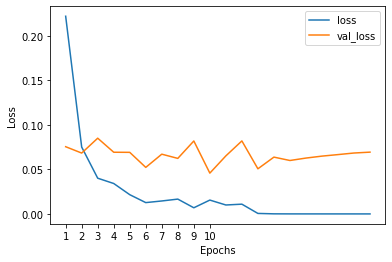

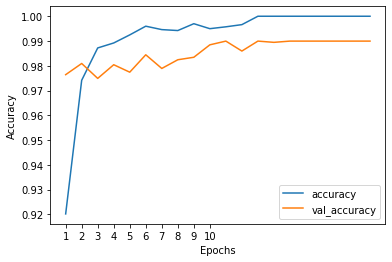

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()



In [ ]:
# Save CNN Model
model.save('face_cnn_model')



INFO:tensorflow:Assets written to: face_cnn_model\assets


In [ ]:
onehot.categories_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
history_df = pd.DataFrame(history.history)

In [ ]:
history_df

In [ ]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [ ]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [ ]:
# Save CNN Model
model.save('face_cnn_model')

In [ ]:
onehot.categories_